Model: "autoencoder_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0262 - val_loss: 0.0105
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0051 - val_loss: 0.0048


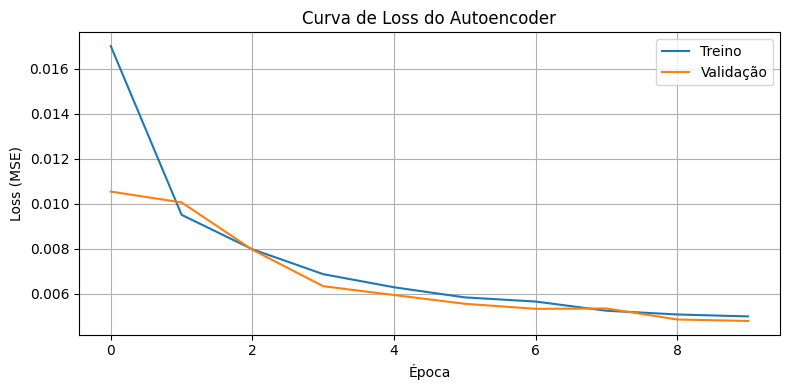

In [3]:
"""
@author: Gabriel Castelo
Autoencoder convolucional simples usando TensorFlow e Keras
para reconstruir imagens do conjunto CIFAR-10 (aprendizado NÃO supervisionado).
"""

import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Model
import matplotlib.pyplot as plt


# 1. Carregar e pré-processar CIFAR-10

(train_images, _), (test_images, _) = datasets.cifar10.load_data()

# Normalizar para [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

# print("Shape train_images:", train_images.shape)
# print("Shape test_images:", test_images.shape)


# 2. Definir o Autoencoder

# Entrada: mesma shape das imagens
input_img = layers.Input(shape=(32, 32, 3))

# ----- ENCODER -----
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)   # 32x32 -> 16x16

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)   # 16x16 -> 8x8

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # 8x8 -> 4x4


# ----- DECODER -----
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)   # 4x4 -> 8x8

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)   # 8x8 -> 16x16

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)   # 16x16 -> 32x32

# Saída: mesma shape da imagem, com ativação sigmoid (valores entre 0 e 1)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Modelo completo: input -> decoded
autoencoder = Model(input_img, decoded, name="autoencoder_cifar10")

autoencoder.summary()


# 3. Compilar o modelo

# Como alvo é a própria imagem (x é quase x̂), loss erro medio quadratico funciona bem
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)


# 4. Treinar o autoencoder

history_ae = autoencoder.fit(
    train_images, train_images, # x = imagens, y = mesmas imagens
    epochs=10, # com 20 epochs fica melhor, mas demorou bastante
    batch_size=128,
    shuffle=True,
    validation_data=(test_images, test_images)
)


# 5. Plotar curvas de loss (treino vs validação)

plt.figure(figsize=(8, 4))
plt.plot(history_ae.history['loss'], label='Treino')
plt.plot(history_ae.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Curva de Loss do Autoencoder')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


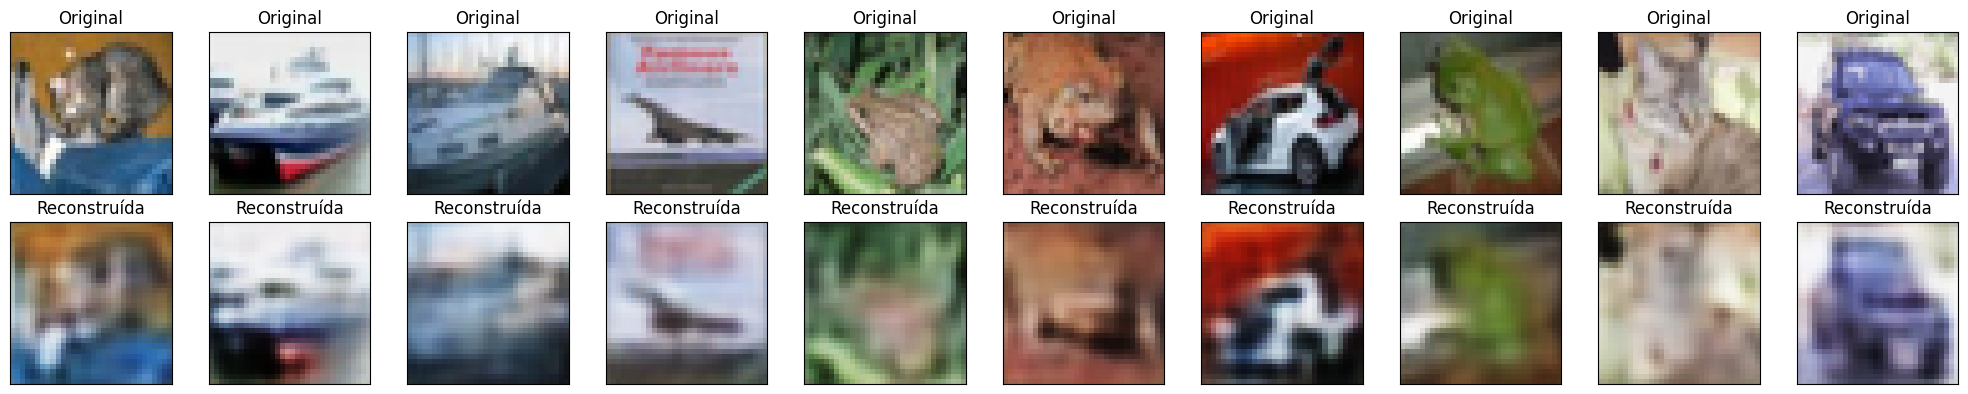

In [4]:

# 6. Visualizar reconstruções
n = 10  # número de imagens para visualizar
test_subset = test_images[:n]
decoded_imgs = autoencoder.predict(test_subset)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagens originais
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_subset[i])
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])

    # Imagens reconstruídas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstruída")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()
